# Train-Test, Train-Validation-Test, and Cross-Validation in Machine Learning


This is a notebook for the medium article [All the Train-Test split and Cross-Validation you should know in Machine Learning](https://bindichen.medium.com/all-the-train-test-split-and-cross-validation-you-should-know-in-machine-learning-7155457ce680)

Please check out article for instructions

**License**: [BSD 2-Clause](https://opensource.org/licenses/BSD-2-Clause)


In [1]:
import numpy as np
from sklearn import datasets

X, y = datasets.load_iris(return_X_y=True)
X.shape, y.shape

((150, 4), (150,))

## 1. Classical Train-Test split (80%-20%)

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [4]:
X_train.shape, y_train.shape

((120, 4), (120,))

In [5]:
X_test.shape, y_test.shape

((30, 4), (30,))

## 2. Classical Train-Validation-Test split (60%-20%-20%)

In [6]:
# First to split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# And then split train again into train and validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=0)

In [7]:
X_train.shape, y_train.shape

((90, 4), (90,))

In [8]:
X_val.shape, y_val.shape

((30, 4), (30,))

In [9]:
X_test.shape, y_test.shape

((30, 4), (30,))

## 3. k-fold Cross-Validation

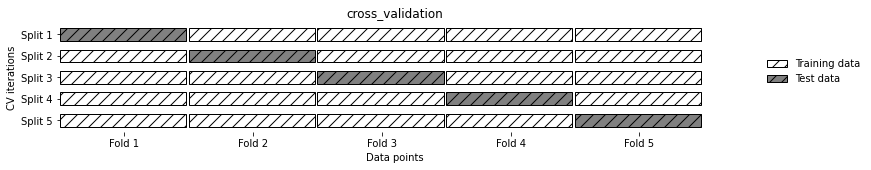

In [10]:
import mglearn
mglearn.plots.plot_cross_validation()

In [11]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5)

In [12]:
# X is the feature set and y is the target
for train_index, test_index in kf.split(X,y): 
    print('train -  {}   |   test -  {}'.format(len(y[train_index]), len(y[test_index])))

train -  120   |   test -  30
train -  120   |   test -  30
train -  120   |   test -  30
train -  120   |   test -  30
train -  120   |   test -  30


### k-fold with Model Evaluation Score

In [13]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

scores = cross_val_score(logreg, X, y, cv=5)

/Users/chen5/anaconda3/envs/tf-tutorial/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [14]:
scores

array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])

## 4. Stratified K fold Cross Validation

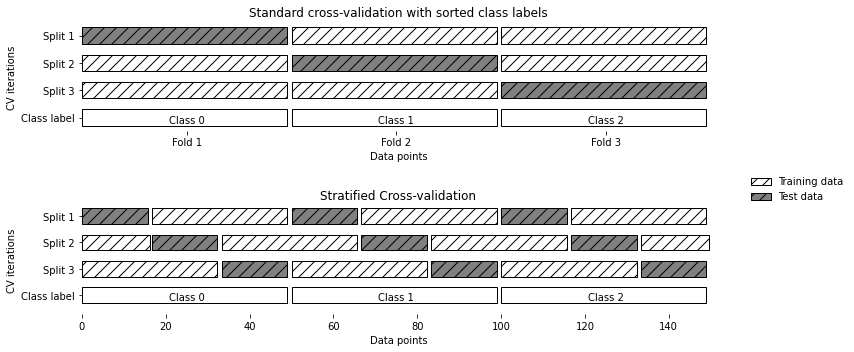

In [15]:
import mglearn
mglearn.plots.plot_stratified_cross_validation()

In [16]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits = 5)

In [17]:
# X is the feature set and y is the target
for train_index, test_index in skf.split(X,y): 
    print('train -  {}   |   test -  {}'.format(np.bincount(y[train_index]), np.bincount(y[test_index])))

train -  [40 40 40]   |   test -  [10 10 10]
train -  [40 40 40]   |   test -  [10 10 10]
train -  [40 40 40]   |   test -  [10 10 10]
train -  [40 40 40]   |   test -  [10 10 10]
train -  [40 40 40]   |   test -  [10 10 10]


## 5. Leave One Out CV

In [18]:
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()

# Printing out 150 data sets
for train, test in loo.split(X, y):
    print("%d %d" % (len(train), len(test)))

149 1
149 1
149 1
149 1
149 1
149 1
149 1
149 1
149 1
149 1
149 1
149 1
149 1
149 1
149 1
149 1
149 1
149 1
149 1
149 1
149 1
149 1
149 1
149 1
149 1
149 1
149 1
149 1
149 1
149 1
149 1
149 1
149 1
149 1
149 1
149 1
149 1
149 1
149 1
149 1
149 1
149 1
149 1
149 1
149 1
149 1
149 1
149 1
149 1
149 1
149 1
149 1
149 1
149 1
149 1
149 1
149 1
149 1
149 1
149 1
149 1
149 1
149 1
149 1
149 1
149 1
149 1
149 1
149 1
149 1
149 1
149 1
149 1
149 1
149 1
149 1
149 1
149 1
149 1
149 1
149 1
149 1
149 1
149 1
149 1
149 1
149 1
149 1
149 1
149 1
149 1
149 1
149 1
149 1
149 1
149 1
149 1
149 1
149 1
149 1
149 1
149 1
149 1
149 1
149 1
149 1
149 1
149 1
149 1
149 1
149 1
149 1
149 1
149 1
149 1
149 1
149 1
149 1
149 1
149 1
149 1
149 1
149 1
149 1
149 1
149 1
149 1
149 1
149 1
149 1
149 1
149 1
149 1
149 1
149 1
149 1
149 1
149 1
149 1
149 1
149 1
149 1
149 1
149 1
149 1
149 1
149 1
149 1
149 1
149 1


## 6. Time Series Cross-Validation

In [19]:
from sklearn.model_selection import TimeSeriesSplit

X = np.array([1, 2, 3, 4, 5, 6])

In [20]:
tscv = TimeSeriesSplit(n_splits=3)

print(tscv)

TimeSeriesSplit(max_train_size=None, n_splits=3)


In [21]:
for train, test in tscv.split(X):
    print("Train: %s , Test: %s" % (train, test))

Train: [0 1 2] , Test: [3]
Train: [0 1 2 3] , Test: [4]
Train: [0 1 2 3 4] , Test: [5]


### Thanks for reading

This is a notebook for the medium article [All the Train-Test split and Cross-Validation you should know in Machine Learning](https://bindichen.medium.com/all-the-train-test-split-and-cross-validation-you-should-know-in-machine-learning-7155457ce680)

Please check out article for instructions